# 加载包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib inline


# K近邻
## 决策边界

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


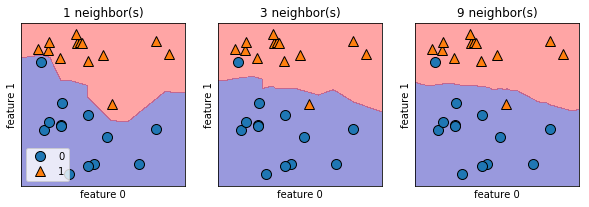

In [3]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

## 乳腺癌数据集

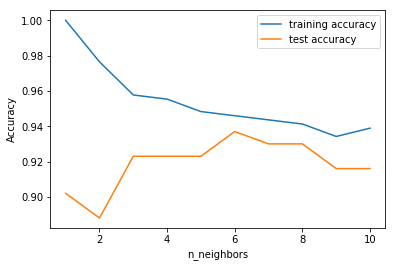

In [4]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

train_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

for neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,train_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 回归

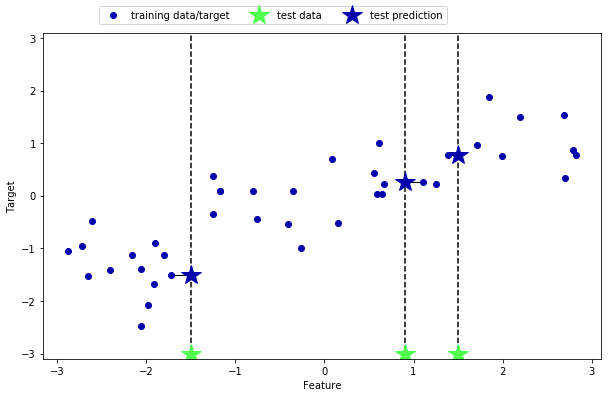

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

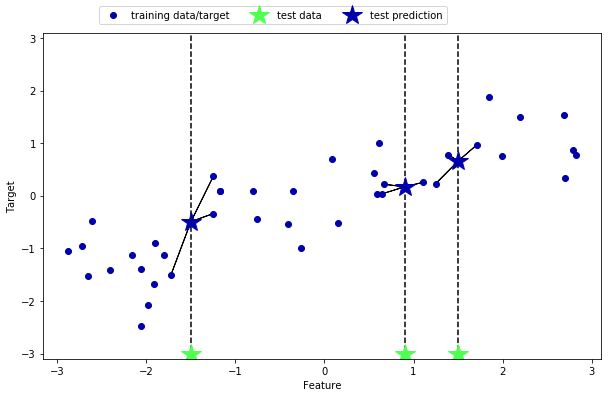

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

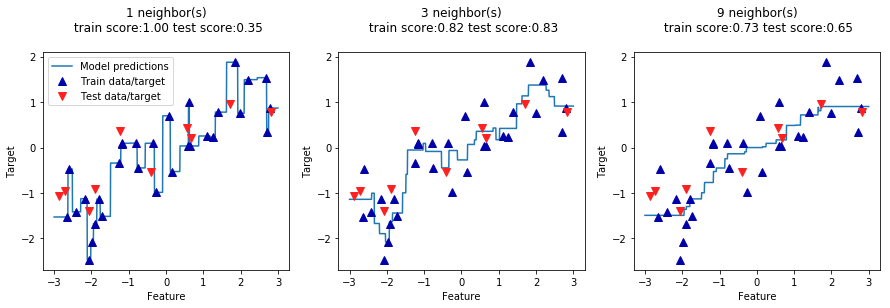

In [7]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

#将wave数据集分为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#创建3个子图用于显示不同neighbors对应结果
fig,axes=plt.subplots(1,3,figsize=(15,4))

#创建预测点
line=np.linspace(-3,3,1000).reshape(-1,1)

for neighbors,ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title("{} neighbor(s)\n train score:{:.2f} test score:{:.2f}\n".format(
        neighbors,
        reg.score(X_train,y_train),
        reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Train data/target","Test data/target"],loc="best")

# 线性模型

w[0]: 0.393906  b: -0.031804


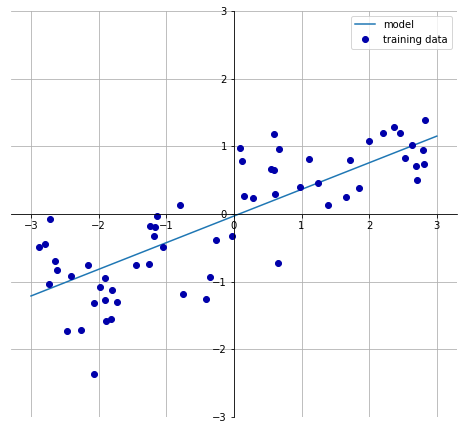

In [8]:
mglearn.plots.plot_linear_regression_wave()

## OLS 普通最小二乘法

### wave数据集

In [9]:
from sklearn.linear_model import LinearRegression

X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)

print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

print("Train score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test score:{:.2f}".format(lr.score(X_test,y_test)))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746
Train score:0.67
Test score:0.66


### 波士顿房价数据集

In [10]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

lr=LinearRegression().fit(X_train,y_train)

print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

print("Train score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test score:{:.2f}".format(lr.score(X_test,y_test)))

lr.coef_:[-4.02752236e+02 -5.00710011e+01 -1.33316908e+02 -1.20021023e+01
 -1.27106873e+01  2.83052585e+01  5.44920273e+01 -5.17339345e+01
  2.52602789e+01  3.64990704e+01 -1.01038605e+01 -1.96288897e+01
 -2.13677312e+01  1.46473758e+01  2.89505391e+03  1.51026852e+03
  1.17995400e+02 -2.65658068e+01  3.12488451e+01 -3.14463610e+01
  4.52535825e+01  1.28349557e+03 -2.24600306e+03  2.22198614e+02
 -4.66264354e-01  4.07661992e+01 -1.34357879e+01 -1.90960479e+01
 -2.77605103e+00 -8.09710327e+01  9.73141885e+00  5.13324280e+00
 -7.87928926e-01 -7.60269229e+00  3.36717627e+01 -1.15051345e+01
  6.62672250e+01 -1.75632324e+01  4.29826712e+01  1.27662043e+00
  6.09633677e-01  5.71868313e+01  1.40823103e+01  5.53404218e+01
 -3.03481907e+01  1.88121756e+01 -1.37772336e+01  6.09790464e+01
 -1.25792000e+01 -1.20021023e+01 -1.76980605e+01 -3.40279371e+01
  7.15036708e+00 -8.41017086e+00  1.69857259e+01 -1.29412471e+01
 -1.18060747e+01  5.71334581e+01 -1.75814680e+01  1.69557926e+00
  2.72177388e+01

## 岭回归 L2正则化

In [11]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)
print("Train score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Test score:{:.2f}".format(ridge.score(X_test,y_test)))

Train score:0.89
Test score:0.75


In [12]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("Train score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Test score:{:.2f}".format(ridge10.score(X_test,y_test)))

Train score:0.79
Test score:0.64


In [13]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("Train score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Test score:{:.2f}".format(ridge01.score(X_test,y_test)))

Train score:0.93
Test score:0.77


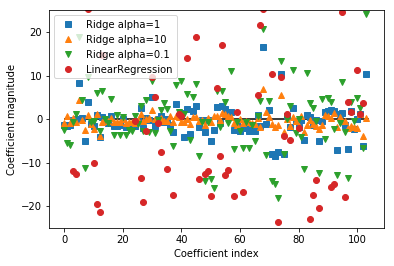

In [14]:
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

## 学习曲线

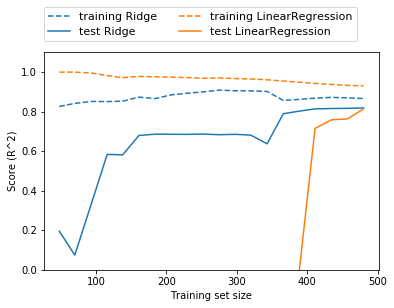

In [15]:
mglearn.plots.plot_ridge_n_samples()

## Lasso L1正则化

In [16]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
print("Train score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Test score:{:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso.coef_!=0)))

Train score:0.29
Test score:0.21
Number of features used:4


In [17]:
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("Train score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Test score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso001.coef_!=0)))

Train score:0.90
Test score:0.77
Number of features used:33


In [18]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("Train score:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test score:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso00001.coef_!=0)))

Train score:0.95
Test score:0.64
Number of features used:94


Text(0,0.5,'Coefficient magnitude')

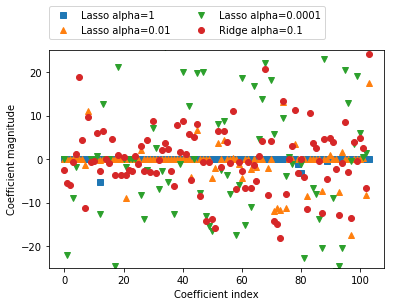

In [19]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## 用于分类的线性模型

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


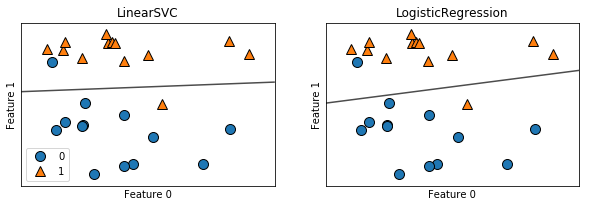

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()

fig,axes=plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

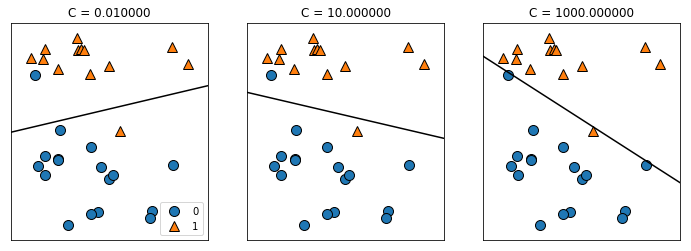

In [21]:
mglearn.plots.plot_linear_svc_regularization()

In [22]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

logreg=LogisticRegression().fit(X_train,y_train)

print("Train score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test score:{:.3f}".format(logreg.score(X_test,y_test)))

Train score:0.953
Test score:0.958


In [23]:
logreg100=LogisticRegression(C=100).fit(X_train,y_train)

print("Train score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("Test score:{:.3f}".format(logreg100.score(X_test,y_test)))

Train score:0.972
Test score:0.965


In [24]:
logreg001=LogisticRegression(C=0.01).fit(X_train,y_train)

print("Train score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("Test score:{:.3f}".format(logreg001.score(X_test,y_test)))

Train score:0.934
Test score:0.930


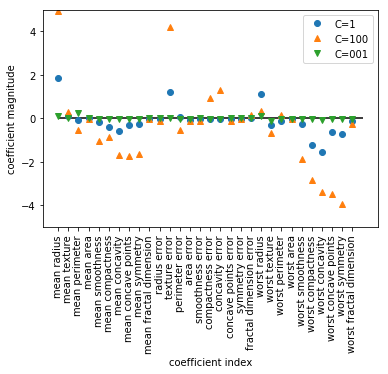

In [25]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=001")
plt.hlines(0,0,cancer.data.shape[1])
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.ylim(-5,5)
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.legend()

## 多分类

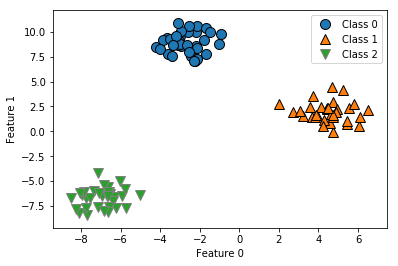

In [26]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

In [27]:
lr_svm=LinearSVC().fit(X,y)
print("Coefficient shape: ",lr_svm.coef_.shape)
print("Intercept shape: ",lr_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


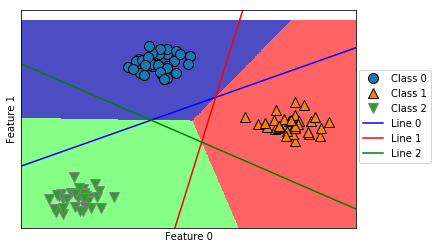

In [28]:
mglearn.plots.plot_2d_classification(lr_svm,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(lr_svm.coef_,lr_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2","Line 0","Line 1","Line 2"],loc=(1.01,0.3))

# 决策树

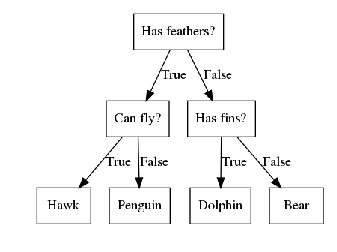

In [29]:
mglearn.plots.plot_animal_tree()

In [30]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print("train score:{:.3f}".format(tree.score(X_train,y_train)))
print("test score:{:.3f}".format(tree.score(X_test,y_test)))

train score:1.000
test score:0.937


## 限制深度 预剪枝 减小过拟合

In [31]:
tree =DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

print("train score:{:.3f}".format(tree.score(X_train,y_train)))
print("test score:{:.3f}".format(tree.score(X_test,y_test)))

train score:0.988
test score:0.951


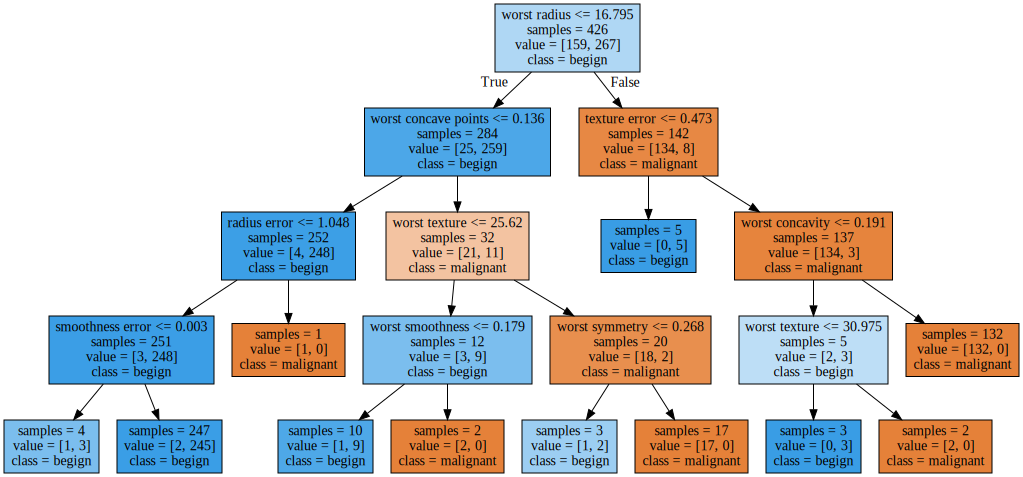

In [32]:
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file="tree.dot",class_names=["malignant","begign"],
               feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph=f.read()

graphviz.Source(dot_graph)

In [33]:
print("feature importance:\n{}".format(tree.feature_importances_))

feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


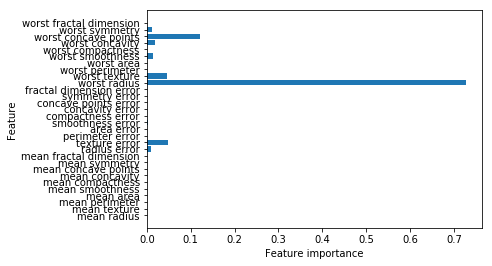

In [34]:
def plot_feature_importance_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(range(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importance_cancer(tree)

Feature importances: [0. 1.]


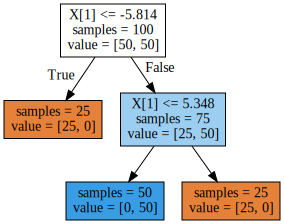

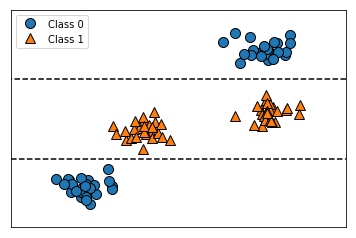

In [35]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

# 决策树集成

## 随机森林   自主采样 特征数

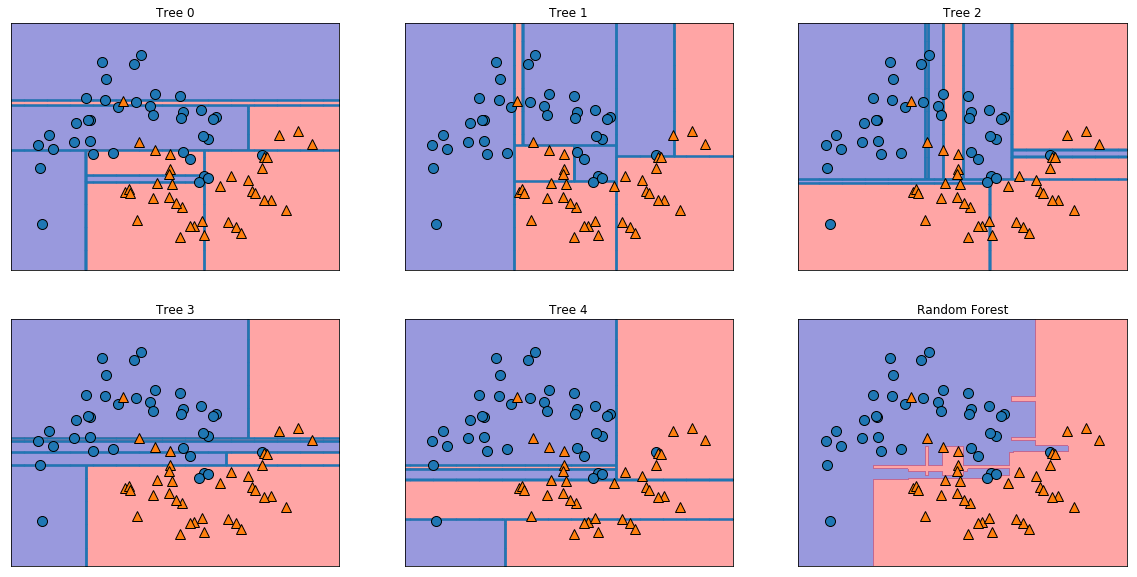

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,ax=axes[-1,-1],fill=True,alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("train score:{:.3f}".format(forest.score(X_train,y_train)))
print("test score:{:.3f}".format(forest.score(X_test,y_test)))

train score:1.000
test score:0.972


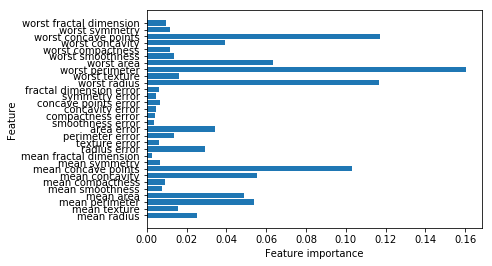

In [38]:
plot_feature_importance_cancer(forest)

## 梯度提升树 学习率

Accuracy on training set:1.000
Accuracy on test set:0.958


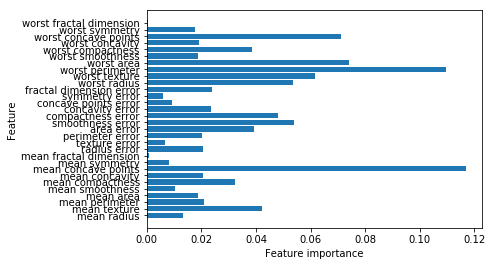

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

plot_feature_importance_cancer(gbrt)

Accuracy on training set:0.991
Accuracy on test set:0.972


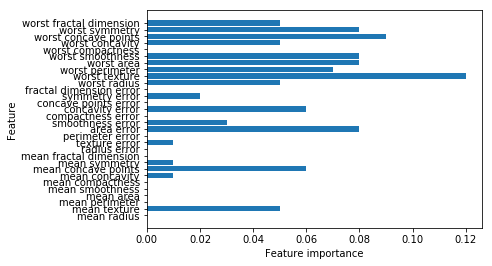

In [40]:

gbrt=GradientBoostingClassifier(max_depth=1,random_state=0)
gbrt.fit(X_train,y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

plot_feature_importance_cancer(gbrt)

Accuracy on training set:0.988
Accuracy on test set:0.965


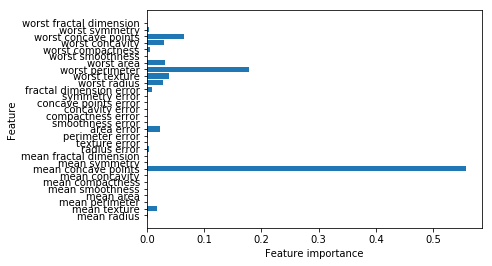

In [41]:

gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

plot_feature_importance_cancer(gbrt)

# 核支持向量机

Text(0,0.5,'Feature 1')

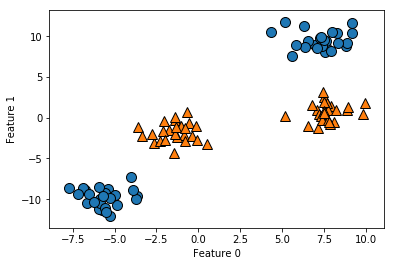

In [42]:
X,y=make_blobs(centers=4,random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

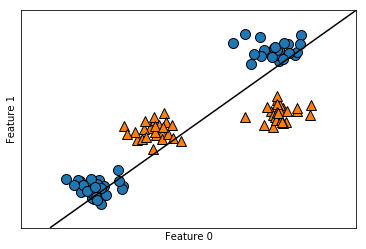

In [43]:
#线性SVM
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'Feature 1 ** 2')

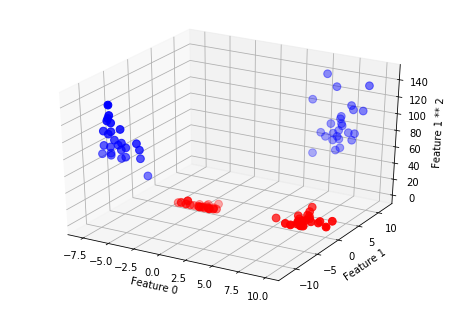

In [44]:
X_new=np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure=plt.figure()
ax=Axes3D(figure)

mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',cmap=mglearn.cm2,s=60)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

Text(0.5,0,'Feature 1 ** 2')

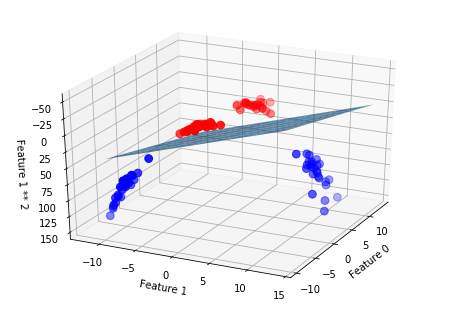

In [45]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)

xx=np.linspace(X[:,0].min()-2,X[:,1].max()+2,50)
yy=np.linspace(X[:,0].min()-2,X[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=.7)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',cmap=mglearn.cm2,s=60)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

Text(0,0.5,'Feature 1')

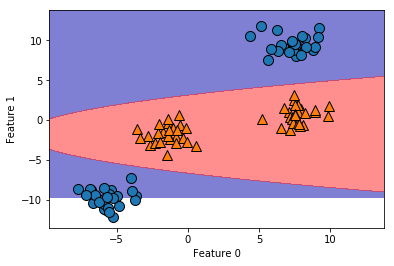

In [46]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

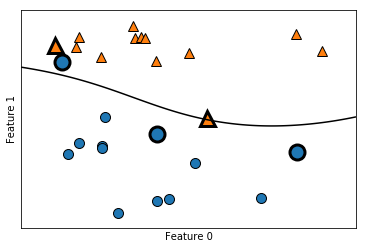

In [47]:
from sklearn.svm import SVC

X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

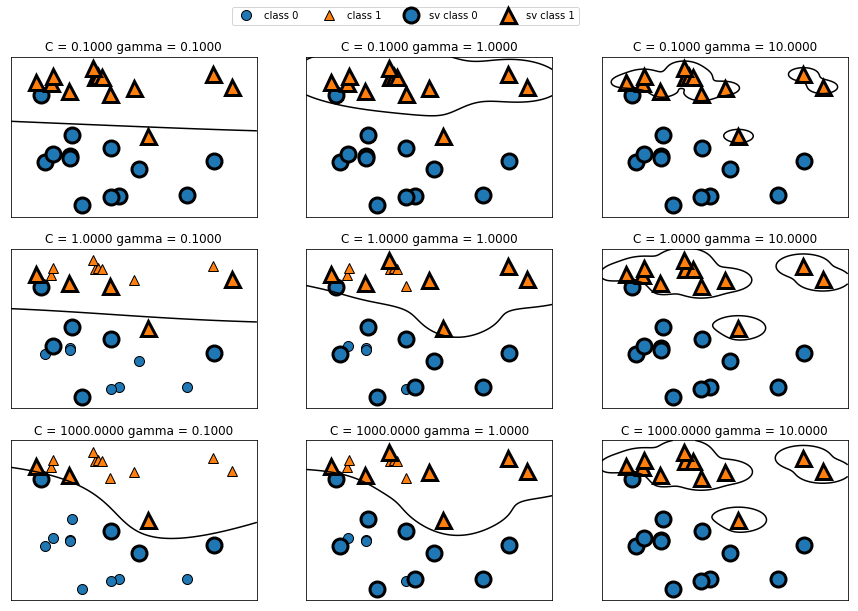

In [48]:
fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)

axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],ncol=4,loc=(.9,1.2))

In [49]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

svm=SVC()
svm.fit(X_train,y_train)

print("Train score:{:.3f}".format(svm.score(X_train,y_train)))
print("Test score:{:.3f}".format(svm.score(X_test,y_test)))

Train score:1.000
Test score:0.629


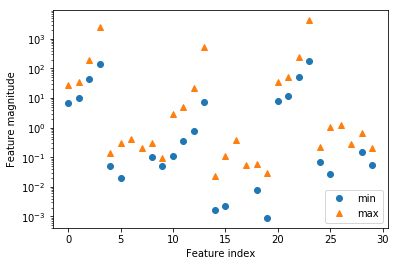

In [50]:
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [51]:
min_on_training=X_train.min(axis=0)
max_on_training=X_train.max(axis=0)

range_on_training=max_on_training-min_on_training

X_train_scaled=(X_train-min_on_training)/range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [53]:
svm=SVC()
svm.fit(X_train_scaled,y_train)

X_test_scaled=(X_test-min_on_training)/range_on_training

print("Accuracy on training set:{:.3f}".format(svm.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}".format(svm.score(X_test_scaled,y_test)))

Accuracy on training set:0.948
Accuracy on test set:0.951


In [54]:
svm=SVC(C=1000)
svm.fit(X_train_scaled,y_train)

X_test_scaled=(X_test-min_on_training)/range_on_training

print("Accuracy on training set:{:.3f}".format(svm.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}".format(svm.score(X_test_scaled,y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.972


# 神经网络

Text(0,0.5,'Feature 1')

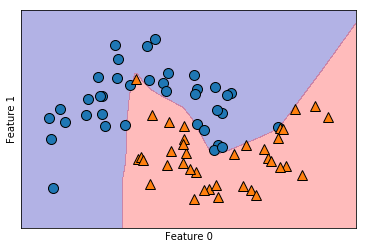

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

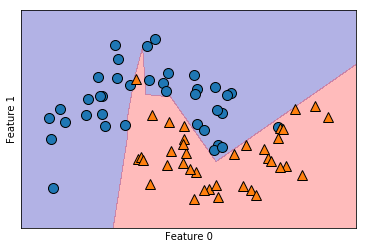

In [62]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

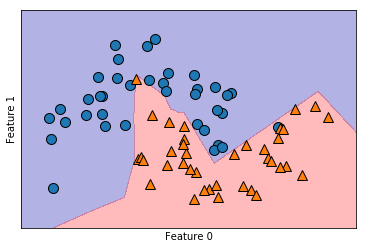

In [65]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

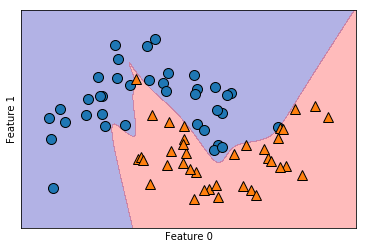

In [67]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10],activation='tanh').fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

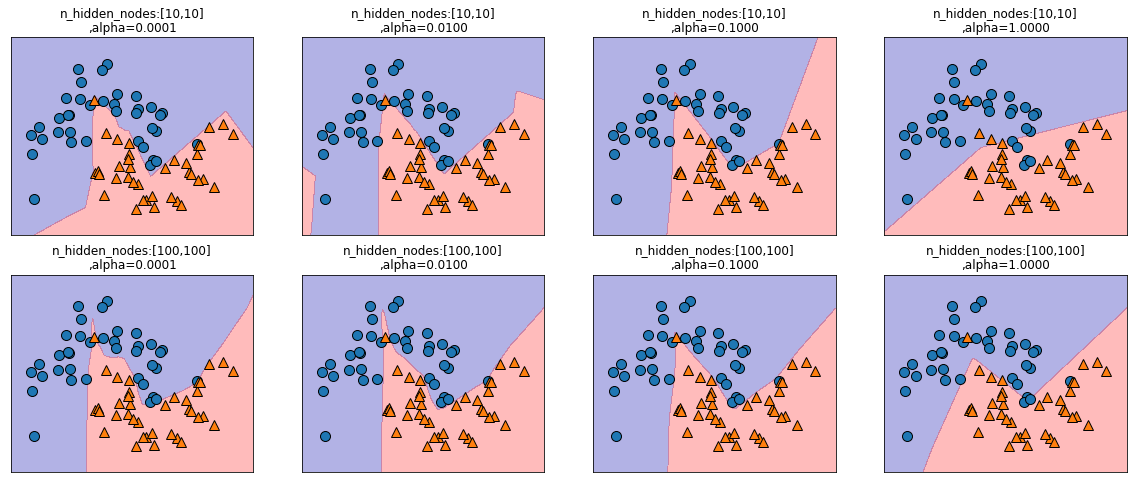

In [71]:
fig,axes=plt.subplots(2,4,figsize=[20,8])
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden_nodes:[{},{}]\n,alpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))                     

In [72]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [73]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print("Accuracy on training:{:.3f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test:{:.3f}".format(mlp.score(X_test,y_test)))

Accuracy on training:0.906
Accuracy on test:0.881


In [75]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)

X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on training:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training:0.991
Accuracy on test:0.965


/opt/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [76]:
mlp=MLPClassifier(random_state=0,max_iter=1000)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on training:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training:0.993
Accuracy on test:0.972


In [77]:
mlp=MLPClassifier(random_state=0,max_iter=1000,alpha=1)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on training:{:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

Accuracy on training:0.988
Accuracy on test:0.972
